In [16]:
import json
import requests
from config import api_key #for crime data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [17]:
# Study data files
gasPrices = "GasPrices.csv"

# Read the mouse data and the study results
gasPrices = pd.read_csv(gasPrices)
gasPrices= gasPrices.rename(columns={"Boston, MA Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)": "Boston", "Chicago Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)": "Chicago", "Cleveland, OH Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)": "Cleveland","Denver Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)": "Denver", 
                                        "Houston Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)":"Houston",
                                     "Los Angeles Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)":"Los Angeles", 
                                     "Miami, FL Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)":"Miami", 
                                     "New York City Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)":"New York", 
                                     "San Francisco Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)":"San Francisco", 
                                     "Seattle, WA Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)":"Seattle"})

gasPrices.melt(id_vars=["Date"], 
        var_name="City", 
        value_name="Value")

gasPrices2019 = gasPrices[gasPrices['Date'].str.contains("2019")]


gasPrices2019 = gasPrices2019.replace(['Jan-2019','Feb-2019',
'Mar-2019',
'Apr-2019',
'May-2019',
'Jun-2019',
'Jul-2019',
'Aug-2019',
'Sep-2019',
'Oct-2019',
'Nov-2019',
'Dec-2019'],['January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December',])



Gas = gasPrices2019.melt(id_vars=["Date"], 
        var_name="City", 
        value_name="Gas Price")

Gas["Unique"] = Gas["Date"] + Gas["City"]



In [18]:
Temps = "Stephen/Weather CSV/Avg Temp per Month.csv"

Temps = pd.read_csv(Temps)

Temps = Temps.drop(['Unnamed: 0'], axis=1)

Temps = Temps.melt(id_vars=["City"], 
        var_name="Date", 
        value_name="Weather")

Temps = Temps[['Date', 'City', 'Weather']]
Temps["Unique"] = Temps["Date"] + Temps["City"]


In [19]:
# Join Data
Combined = pd.merge(left=Temps, right=Gas, how='left', left_on='Unique', right_on='Unique')

Combined = Combined.rename(columns={"Date_x": "Date", 
                         "City_x": "City"})
Combined = Combined.drop(['Unique','Date_y','City_y'], axis=1)


([<matplotlib.axis.XTick at 0x7fac2cea2f90>,
 <a list of 12 Text xticklabel objects>)

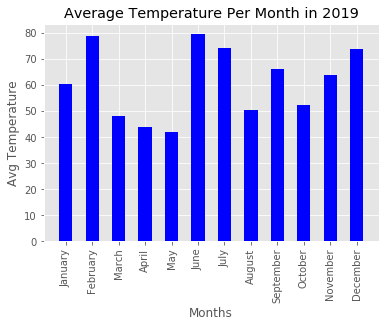

In [39]:
#avg temp

date_array = Combined['Date'].unique()

avg_month = Combined.groupby(['Date']).mean()

weather = avg_month['Weather'].tolist()

plt.style.use('ggplot')
x = date_array

x_pos = [i for i, _ in enumerate(x)]

plt.bar(date_array, weather, color = 'blue', width = 0.5)
plt.xlabel("Months")
plt.ylabel("Avg Temperature")
plt.title("Average Temperature Per Month in 2019")

plt.xticks(x_pos, x, rotation=90)


([<matplotlib.axis.XTick at 0x7fac316d7650>,
 <a list of 10 Text xticklabel objects>)

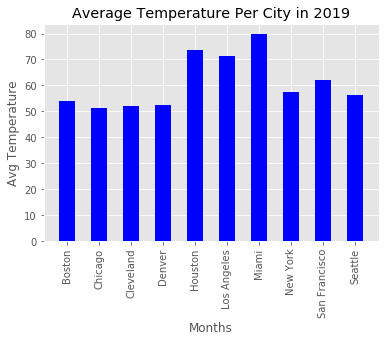

In [41]:
#temperature for hottest citys 

city_array = Combined['City'].unique()

avg_month = Combined.groupby(['City']).mean()

weather = avg_month['Weather'].tolist()

plt.style.use('ggplot')

x= city_array
x_pos = [i for i, _ in enumerate(x)]

plt.bar(city_array, weather, color = 'blue', width = 0.5)
plt.xlabel("Months")
plt.ylabel("Avg Temperature")
plt.title("Average Temperature Per City in 2019")

plt.xticks(x_pos, x, rotation=90)

